<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/central-limit-theorem.png" width="600"> 

# <center> Науки о данных <br>  <br> Свойства оценок, ЗБЧ и ЦПТ в ~~мемах~~ картинках </center>


## Примерная схема матстата 

__Задача:__ мы предполагаем, что какая-то штука описывается каким-то распределением с параметром $\theta$. Чтобы понимать эту штуку, нам нужно параметр $\theta$ оценить. __Важно:__ мы препдполагаем, что $\theta$ - константа. 

<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/matstat_sh.png" width="750"> 

__Оценивание:__ получить оценку $\hat \theta$ можно разными методами. Например, методом моментов или методом максимального правдоподобия. 

__Точечная оценка:__ Та оценка, которую мы поулчим, будет функцией от выборки, то есть слуайной величиной. Если у нас есть одна выборка, то будет одна оценка. Если другая выборка, то будет другая оценка. Нам бы хотелось понимать насколько другой может оказаться оценка при новой выборке. Для этого нам нужно знать как эта оценка распределена. 

Зная распределение оценки, мы сможем посмотреть в каком диапазоне находится $95\%$ её вероятностной массы и сказать, что за края этого диапазона истиное значение будет вылетать редко. Этот диапозон называется доверительным интервалом. Если он получается коротким, то оценка довольно точная. Если длинным, то не очень.

__Распределение оценки:__ Чтобы построить для оценки параметра доверительный интервал, нужно знать как эта оценка распределена. Тут нам на помощь приходят разные союзники. Например, для среднего это ЦПТ. Она говорит, что среднее асимптотически нормально распределено, и мы можем использовать нормальное распределение для доверительных интервалов и проверки гипотез. Есть и другие союзники, которые помогают нам в разных ситуациях понимать насколько точными оказались прогнозы и отвечать на вопросы. 

## Что хочет статистик

Когда статистик оценивает какой-нибудь параметр, он хочет: 

* __несмещённость__ (при фиксированном размере выборки мы в среднем не ошибаемся) 
* __состоятельность__ (при бесконечном расширении выборки мы приходим к истиному значению)
* __эффективность__ (у нашей оценки самая маленькая дисперсия для её класса (например, для всех несмещенных оценок))
* иногда ещё статистик ссылается на какую-то мифическую __асимптотическую нормальность__ оценки.

На этом семинаре поговорим про то, что это всё значит и построим немного картинок. 

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# 1. ЗБЧ, сходимость по вероятности и состоятельность


## Упражнение 1 (разминка) 

На теории вероятностей мы говорили про ЗБЧ (закон больших чисел). Мы говорили, что он очень клёвый, так как разрешает делать кучу вещей. Давайте вспомним его формулировку: 

#### Слабая форма ЗБЧ (Пафнутий Львович Чебышёв)

Пусть $X_1, \ldots, X_n$ попарно независимые и одинаково распределённые случайные величины с конечным вторым моментом, $E(X_i^2) < \infty$, тогда имеет место сходимость:

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

__Простым языком:__ 

* среднее арифметическое большого числа похожих случайных величин «стабилизируется» с рочтом их числа
* как бы сильно случайные величины не отклонялись от своего среднего значения, эти отклонения взаимно гасятся
* если у тебя есть страховая фирма, можно заработать бабла (самая простая формулировка) 

> Например, в XVI веке он впервые разрешил страховым команиям зарабатывать деньги. Люди вперввые начали составлять актуарные таблицы. Это такие таблицы, где указана ожидаемая продолжительность жизни для данного возраста и пола. Люди начали собирать данные о смертности и оценивать вероятность дожития человека до определённого возраста. На этом строились тарифы на страхование. Появление подобных таблиц обязано зарождению в течение 1600-х годов теории вероятности, которая впервые объяснила людям как случайные вещи при достаточно больших масштабах сглаживаются и становятся очень даже предсказуемыми. Надо признать, что у страхования было довольно трудное детство — как раз потому, что люди плоховато понимали концепцию вероятности. В голове довольно трудно удержать её. Многие люди и по сей день ошибочно думают, что могут влиять на случайность каким-то образом. Например, некоторые думают, что чаще других выбрасывают на кубике шестёрки. А ещё многие когнитивные искажения в нашей повседневной жизни вызваны плохим пониманием вероятности. Например, многие не понимают формулу Байеса и не могут адекватно оценить вероятность того, что [они заболели.](https://dyakonov.org/2015/10/12/%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B0-%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%B0/) Даниэль Канеман в "Thinking fast and slow" пишет про много таких вещей, но мы чего-то отвлеклись. 

__Давайте нарисуем ЗБЧ.__ Все мы знаем, что математическое ожидание игральной кости это $3.5$. Сделайте симуляцию: 

* подкиньте кость 1 раз, посчитайте среднее число на ней
* подкиньте кость 2 раза, посчитайте среднее число на ней

.....

* подкиньте кость 500 раз, посчитайте среднее число на ней

Постройте картинку для всех этих средних и убедитесь в том, что оно и правда сходится к $3.5$.

In [ ]:
# Решаем задачку :) 

## Упражнение 2 (сходимость по вероятности) 

Увидели, что оно сходится? Вопрос только в том как именно. Надо стрелкой в ЗБЧ есть какая-то буква $p$. 

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

Она означает, что последовательность случайных величин слева сходится к случайной величине справа по вероятности, то есть чем больше $n$ тем ближе вероятность отклонения $\bar x_n$ от $E(X)$ к нулю: 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon) \to 0
$$

Нарисуем её! Возьмём $\varepsilon = 0.01$, нарисуем на нашей картинке из предыдущего упражнения коридор $3.5 \pm \varepsilon$, продолжим ряд до $100000$ подбрасываний и увидим, как постепенно $\bar x_n$ влезает в этот коридор и всё реже и реже выскакивает из него. 

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого давайте сгенерируем много-много траекторий для игральной кости. Такиже как на картинке выше. А после посмотрим как часто на конкретном шаге эти траектории пробивают коридор $3.5 \pm \varepsilon$. Частота таких пробоин будет оценкой вероятности 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon).
$$

In [ ]:
# Решаем задачку :)
# На самом деле просто копируем код первой и рисуем лишнюю линию

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. При этом для более узкого коридора вероятность убывает медленнее, что логично :) 

Для нашей ситуации со сходимостью к константе можно построить аналогичные графики для дисперсии среднего. На матстате мы её вычисляли: 

$$
Var(\bar x_n) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$

В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. Разобраться в таком графике вам придётся дома. __Важно держать в голове, что дисперсия убывает только при сходимости к константе!__

Давайте посмотрим на то как все три картинки выглядят рядом. На них нарисовано, как среднее $\bar x$, посчитанное по выборке $x_1, \ldots, x_n \sim iid N(2,1),$ сходится по вероятности к $2$. 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_prob_conv.gif" width="1500"> 
</center>

Каждый статистик хочет состоятельности. Именно её мы сейчас илюстрировали. Узнали? Согласны? 


__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __состоятельной,__ если $\hat \theta \overset{p}{\to} \theta$ по вероятности при росте $n$. 

Среднее $\bar x_n$ это оценка для математического ожидания. Она постепенно к нему приближается, значит состоятельна. Для любой другой оценки любого другого параметра можно построить аналогичную картинку и дома вы этим займётесь.

## Упражнение 3 (расходимость по вероятности) 

Теперь мы знаем как выглядит сходимость по вероятности. Интересно было бы посмотреть как выглядит её отсутствие.

Распределение Коши тот ещё фрукт. У стандартного распределения Коши такая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит красиво. Красота, при этом, приносит нам кучу проблем. Одна из таких проблем - это отсутствие математического ожидания и дисперсии. ЗБЧ говорит нам, что для некоторых распределений 

$$ 
P( \mid \bar x - E(X)\mid \ge \varepsilon  ) \to 0, 
$$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Интересно было бы узнать к чему будет сходиться выборочное среднее для распределения Коши __(математического ожидания то не существует).__ 

Постройте для выборочного среднего распределения Коши картинку, которую мы строили при иллюстрации ЗБЧ чуть выше. 

In [21]:
# Решаем задачку :) 
# На самом деле просто копируем код первой и меняем распределение

(10000, 1000)

Тут может банально повести и траектория будет визуально выглядеть хорошо. Но что происходит с вероятностями? 

In [ ]:
# Решаем задачку :) 

Никакого движения к нулю. Постоянные пробои в нашем коридоре. При этом во времени их количество никак не уменьшается. Вот так вот и выглядит отсутствие сходимости по вероятности. Обратите внимание, что величина пробоя не очень важна. В случае, когда сходимость есть, пробои также могут быть очень большими, но они происходят всё реже. Тут они не происходят реже.

Давайте посмотрим на то как все три картинки выглядят рядом. На них изобразим первые $200$ шагов для распределения Коши. Чисто визуально сравните с первыми $200$ шагами для нормального распределения из предыдущего упражнения и ужаснитесь. 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_prob_unconv.gif" width="1400"> 
</center>

__Вопрос на вшивость:__  Является ли среднее состоятельной оценкой для мат ожидания распределения Коши? 

__Вопрос на упоротость:__ Как объяснить что такое состоятельность и зачем мы её хотим бабушке?

# 2. Несмещённость 

Состоятельность нарисовали? Пришло время несмещённости!  

__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __несмещённой,__ если $E(\hat \theta) = \theta$.


## Упражнение 4 (несмещённость) 


В долине летучей мыши Шикака живёт племя Вачати. Оно охотится на мамонтов. Древний Бог Оньянкопонга не так давно сгенерировал в долине реки из нормального распределения $10$ тысяч мамонтов со средним весом $300$ кг и стандартным отклонением $100$ кг. 

In [36]:
norm_rv = sts.norm(loc=300, scale=100)

# вся генеральная совокупность 
x_mamont = norm_rv.rvs(size = 10**4)

np.mean(x_mamont) # настоящее среднее

299.8055301540261

Каждый день Вачати ходят на охоту и убивают мамонта. От веса убитого зависит то, насколько сильно племя будет голодать. Конечно же, аборигены хотят значть о весе добычи заранее. Для этого они держат у себя в штате троих шаманов. Все они живут на вершине одинокой горы, с которой стабильно видна сотня мамонтов. Все три шамана обладают ясным взором и могут определить вес мамонта с одного взгляда. 

* Шаман Одэхингум (лёгкое колебание воды) уверен в своём взоре и без толики сомнения каждый раз сообщает вождю, что вес мамонта, которого поймает племя будет 

$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$

* Шаман Пэпина (виноградная лоза, растущая вокруг дуба) не любит, когда его избивают за слишком оптимистичные прогнозы. Поэтому он считает среднее по сотне мамонтов и немного занижает его на волшебную константу, подсказанную духами.  Обычно, когда племя ловит более большого мамонта, чем спрогнозированно, шамана никто не бьёт. 

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}.$$

* Шаман Апониви (где ветер вырывает промежуток с корнем) тоже не любит боль. Поэтому он тоже коректирует прогноз

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n}.$$

__Вопрос на вшивость:__  Кто из Шаманов даёт смещённые оценки? Почему? 

Проилюстрируйте несмещённость оценок! Для этого: 

* Сгенрируйте выборку из $100$ мамонтов, которых видят шаманы с одинокой горы. Для каждого посчитайте оценку веса убитого мамонта. 
* Сделайте это $200$ раз, найдите для каждого Шамана среднее их оценок. Это будет оценкой для $E(\hat \theta)$. 
* Нарисуйте для всех трёх выборок ящик с усами. Какие из шаманов чаще ошибаются? 

In [46]:
# Команда нам не подходит, так как она всю матрицу сделает без повторений
# np.random.choice(x_mamont, size=(n,m), replace=False)

n = 100

th_od = np.zeros(200)
th_pe = np.zeros(200)
th_ap = np.zeros(200)

# Ваш код для генераций 

In [47]:
# посмотрим на оценки E(\hat \theta)
np.mean(th_od), np.mean(th_pe), np.mean(th_ap)

(298.87102520117315, 256.87102520117315, 293.8210252011731)

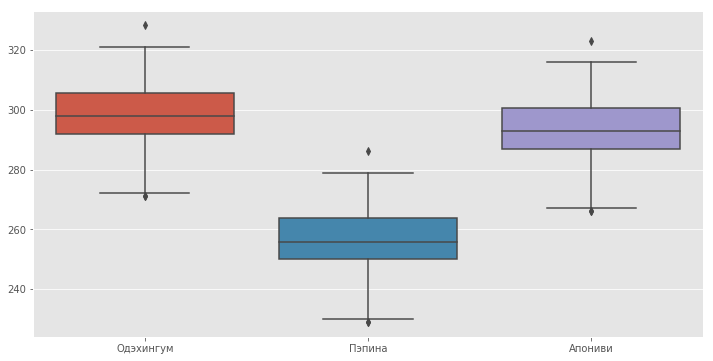

In [80]:
plt.figure(figsize=(12,6))

df = pd.DataFrame(zip(th_od, th_pe, th_ap), columns = ['Одэхингум', 'Пэпина', 'Апониви'])
sns.boxplot(data = df,);

Что мы видим? Ящик Пэпина сдвинут довольно сильно вниз по отношению к остальным. Это и есть то самое смещение в оценивателе. Второй ящик сдвинулся вниз совсем малость из-за менее координального занижения оценки. 

Давайте попробуем посмотреть как ведут себя распределения оценок шамонов в динамике, при росте числа наблюдений.


<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_boxplot.gif" width="400"> 
</center>

Что мы видим? 

* Красный ящик соответствует несмещённому оценивателю. Он остаётся в районе $300$, то есть в районе реального среднего значения. Дисперсия оценки при росте числа наблюдений падает и ящик сжимается. Это обычное адекватное поведение оценки. 


$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i$$


* Синий ящик соответствет асимптотически несмещенной оценке. В нём есть константа, на которую шаман коректирует свой прогноз. Чем больше наблюдений оказалось под взором шамана, тем сильнее он уверен в своём предсказании и тем сильнее он уменьшает коректировку. Такая оценка при маленьком числе наблюдений даёт довольно сильное смещение. При росте $n$ смещение уменьшается. На картинке это вырожается в том, что синий ящик постепенно движется вправо, к реальному среднему и положению аналогичному красному ящику. 

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}$$


* Лиловый ящик соотвествует смещённой оценке. Из-за корекции, ящик всегда находится немного левее истиного значения. Мы ошибаемся в этой ситуации при любом числе наблюдений.

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n}$$


Справка для тех, кто не слыхал про усатые ящики: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/Densityvsbox.png" width="500"> 
</center>

Хех. Шаманы. Детский сад. Подавай нам что-нибудь из бизнеса. Окей, договорились. Давайте предположим, что шаманы прогнозируют не вес мамонта, а то на какую сумму в среднем будут наступать страховые случаи. Ясное дело, что наш  бюджет на статистические исследования довольно сильно ограничен. И ежедневно мы можем собирать информацию только от ограниченного числа респондентов. Если мы стабильно будем на основе этой информации получать смещённую оценку страхового покрытия, то вместо получения прибыли в среднем, мы легко можем оказаться банкротами. 

__Ещё раз, ещё раз:__ несмещённость это свойство оценки при фиксированном размере выборки $n$. Оно означает, что ошибка "в среднем", то есть при систематическом использовании оценки, отсутствует. Это довольно хорошее свойство, но не обязательное. Достаточно, чтобы смещение оценки уменьшалось с ростом объёма выборки. Такая оценка называется асимптотически несмещённой. 

__Вопрос на вшивость:__ Какие из трёх оценок состоятельны? 

__Вопрос на упоротость:__ Как пояснить за несмещённость всё той же бабушке? 

### Достаточное условие Чебышёва

__Теорема:__ Если оценка $\hat \theta$ несмещенная и её дисперсия $Var(\hat \theta) \to 0$ при увеличении выборки, то эта оценка состоятельная.  

Эту теорему часто используют для проверки оценок на состоятельность. Правда условие про несмещенность почему-то иногда забывают. А это условие очень важное. Например, для третьего шамана, дисперсия оценки падает при $n \to \infty$, но из-за смещения оценка сходится не к истине, а к истине минус пять. 

# 3. Эффективность 

Предположим, что у нас есть две оценки. Они обе классные, несмещённые и состоятельные. Возникает вопрос: а какую взять то? Для того, чтобы выбрать, вводят свойство эффективности. 

__Определение:__ Оценка $\hat \theta$ параметра $\theta$ называется __эффективной в некотором классе оценок,__ если её дисперсия, $Var(\hat \theta)$ в этом классе оценок при заданном объёме выборке минимальна. 

Зачем это нужно? Для того, чтобы доверительные интервалы для оценок были как можно уже, то есть для того, чтобы оценка была как можно точнее.


## Упражнение 5 (эффективность) 

У нас есть выборка $x_1, \ldots, x_n \sim iid U[0; \theta]$. Мы оценили параметр $\theta$ двумя способами. Методом моментов и методом максимального правдоподобия: 


$$\hat \theta_{MM} = 2 \bar x, \qquad \qquad \hat \theta_{ML} = \frac{n+2}{n} \cdot x_{max}$$

Обе оценки оказались несмещёнными и состоятельными. Какую из них выбрать? Ответ прост: надо понять какая из них эффективнее.  

Сгенерируйте выборку оценок каждого вида. Постройте по ним гистограммы и найдите этот простой ответ.

In [ ]:
# Ура новый код!

Видим, что у оценки максимального правдоподобия разброс оказался меньше.  

In [85]:
# Посчитайте дисперсии для каждой из выборок

0.08122184428039085

На практике следовало бы выбрать её. Когда у оценки самый маленький разброс в каком-то классе (например в классе несмещённых оценок), её называют __эффективной__ в этом классе. 

Кстати говоря, для оценок из этого упражнения, можно руками выяснить, что: 

$$ E(\hat \theta_{MM} - \theta)^2 = \frac{\theta^2}{3n} \qquad \qquad E(\hat \theta_{ML} - \theta)^2 = \frac{2 \theta^2}{n(n+1)}.$$

Получится, что при $n = 1,2$ дисперсии совпадут. При $n >2$ оценка максимального правдоподобия будет обладать меньшей дисперсией.

# 4. ЦПТ, сходимость по распределению

На тервере мы говорили не только о ЗБЧ, но ещё и о ЦПТ (центральная предельная теорема). Мы говорили, что она очень клёвая, так как тоже разрешает делать кучу вещей. Вспомним её: 

#### ЦПТ

Пусть $X_1, \ldots, X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots, X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{\sqrt{n} \sigma } \Rightarrow N(0,1)
$$


__Простым языком:__ 

* При определённых условиях сумма достаточно большого числа случайных величин имеет распределение близкое к нормальному 
* __Главное,__ чтобы случайные величины были похожи и не было такого, что одна резко выделяется на фоне остальных 


Нарисуем ЦПТ на картинках! 

## Упражнение 6 (когда там уже асимптотика)

На практике ЦПТ говорит нам, что при больших значениях $n$ мы можем заменять распределение средних нормальным и не особо сильно при этом ошибаться. 

Возникает вопрос: __А что такое большие значения n? Когда наступает асимптотика?__ Для разных распределений  и природных явлений она наступает по-разному. Например, удивительно, сумма из равномерно-распределённых случайных величин, довольно быстро становится куполообразной. Давайте посмотрим на это.

Пусть $X \sim U[-1;1]$, пусть $Y = X_1 + \ldots + X_n$ 

* Нарисуйте гистограмму для $X_1$, $X_1 + X_2$,  $X_1 + X_2 + X_3$ и $X_1 + X_2 + X_3 + X_4$.
* На последней картинке нарисуйте плотность распределения $N(0,1)$ и визуально сравните насколько сильно оно отличается от гистограммы. 

In [ ]:
# ваш код

Уже для четырёх слагаемых распределение довольно сильно напоминает $N(0,1)$. Из довольно медленно сходящихся к нормальному распределений, наверное, можно выделить логнормальное распределение. Попробуйте посмотреть на досуге на его сходимость. 


Вот так равномерное распределение будет вести себя дальше: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_CPT_1.gif" width="350"> 
</center>


А вот пример для хи-квадрат с одной степенью свободы: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_CPT_2.gif" width="350"> 
</center>

## Упражнение 7 (сходимость по распределению)

В ЦПТ над мы нарисовали вот такую стрелку: $\Rightarrow$. Она означает, что последовательность случайных величин сходится по распределению. 

__Определение:__ говорят, что последовательность случайных величин $X_1, X_2, \ldots$ сходится к случайной величине $X$ _по распределению,_ если $F_{X_n}(x) \to F_X(x)$ для всех $x$, в которых $F_X(x)$ непрерывна.

Если функции сходятся, она есть. Если не сходятся, её нет. Всё просто. Давайте посмотрим на конкретные примеры. Все знают, что распредеелние Стьюдента при большом $n$ (число степеней свободы) становится похоже на нормальное, то есть $t(n) \Rightarrow N(0,1)$.

Давайте это продемонстрируем: 

* Постройте на картинке линию: плотность для $N(0,1)$.
* Постройте пять пунктирных разноцветных линий: $t(1)$, $t(2)$, $t(5)$, $t(10)$, $t(50)$.
* Сделайте то же самое для функций распределения
* Сделайте выводы.

__Вопрос на вшивость:__ понимаете ли вы, что это означает для процедуры по проверке гипотез? 

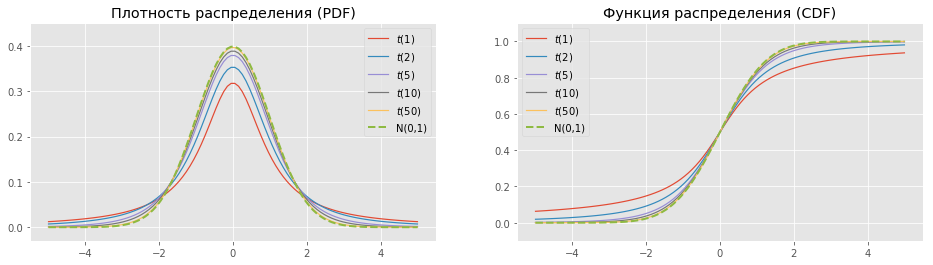

In [97]:
x = np.linspace(-5,5,100)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

for k in [1, 2, 5, 10, 50]:    
    rv = sts.t(df=k)
    pdf = rv.pdf(x)
    cdf = rv.cdf(x) 
    ax[0].plot(x, pdf, label="$t(%s)$" % k, lw=1.2)
    ax[1].plot(x, cdf, label="$t(%s)$" % k, lw=1.2)


rv_limit = sts.norm( )
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

ax[0].plot(x, pdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[0].set_ylim(-0.03,0.45)
ax[0].set_title("Плотность распределения (PDF)")
ax[0].legend() 

ax[1].set_ylim(-0.1,1.1)
ax[1].plot(x, cdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[1].set_title("Функция распределения (CDF)")
ax[1].legend();

Конечно же держите гифку. Как же без неё: 

<center>
<img src="image/animation_convdist_student.gif" width="1500"> 
</center>

## 5. Про другие сходимости (картинка и ссылки почитать) 


На самом деле есть и другие виды сходимостей случайных величин. И между ними даже есть связи: 


<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/conv.png" width="600"> 


Пойдём с правой части кратинки в левую. 

* Самая слабая сходимость, __сходимость по распределению!__ Чтобы сказать, что последовательность случайных величин $X_n$ сходится по распределению к случайной величине $X$, обычно над стрелочкой пишут букву $L$ или букву $d$ или просто рисуют двойную стрелочку, $\Rightarrow$. Из-за того, что эта сходимость самая слабая её так иногда и называют, __слабой.__
* Сходимость чуть посильнее, это __сходимость по вероятности.__ Обычно её обозначают, подписывая над стрелкой букву $p$. Если последовательность сходится по вероятности, тогда она будет сходиться и по распределению. 
* Сходимость по вероятности, в свою очередь следует из __сходимости почти наверное__ (almost surely). Чтобы обозначить эту сходимость, над стрелкой пишут $a.s.$
* Также сходимость по вероятности следует из __сходимости в среднем порядка $r$.__ Над стрелкой в случае такой сходимости либо подписывают порядок сходимости, либо пишут $L^r$. 

Последние два вида сходимостей самые сильные. Между ними нет чёткой взаимосвязи. С ними мы в этой тетрадке познакомиться не успели, но вы можете сделать это сами в почиташках! 

# 6. Почиташки

* [Хороший конспект по разновидностям сходимостей](https://www.probabilitycourse.com/chapter7/7_2_8_solved_probs.php) вместе с хорошей коллекцией задачек по ним. Рекомендую немного почитать об этом и попробовать решить задачки.
* [Небольшой конспект про виды сходимостей](https://nbviewer.jupyter.org/github/FUlyankin/r_probability/blob/master/end_seminars_2019/sem_3/3.1%20varka_and_converg.ipynb) с примерами на R.
* [Учебник Черновой по терверу.](https://github.com/FUlyankin/r_probability/raw/master/books/Хороший%20учебник%20по%20терверу.pdf) Книга хорошая и проапгрейдит ваши знания по терверу, если вы её прочтёте. Такая же небольшая книга есть по матстату. 
